#Скачивание видео с Яндекс

In [ ]:
!pip install git+https://github.com/ai-collab-incubator/downloader@0.1.3

  Cloning https://github.com/ai-collab-incubator/downloader (to revision 0.1.3) to /tmp/pip-req-build-ahsjtml4
  Running command git clone --filter=blob:none --quiet https://github.com/ai-collab-incubator/downloader /tmp/pip-req-build-ahsjtml4
  Resolved https://github.com/ai-collab-incubator/downloader to commit 39268a59dfe0d13220e941983b82994ce8907cdd
  Preparing metadata (setup.py) ... done
  Created wheel for downloader: filename=downloader-0.1.3-py3-none-any.whl size=3263 sha256=c94fa5e9fdd289a9d6ae1fcf40b3aa2793d78fa45024cd6624576d5b64101001
  Stored in directory: /tmp/pip-ephem-wheel-cache-a4usyofd/wheels/6b/1b/59/3af0327968b27d77dceb60670e688c78d66854d8c5db3be80a
Successfully built downloader


In [ ]:
CFG_URL = "https://disk.yandex.ru/d/j4exohUxebQNtA"

In [ ]:
CFG_URL = "https://disk.yandex.ru/d/rHKVlgsRSAka5Q"

In [ ]:
from downloader import YandexDownloader
ya_downloader = YandexDownloader()
video_file, orig_filename = ya_downloader.download(CFG_URL, "all_videos")
orig_filename

9.08GB [14:24, 10.5MB/s]


'AI Karate.zip'

In [ ]:
!unzip all_videos.zip -d all_videos

Archive:  all_videos.zip
  inflating: all_videos/AI Karate/VID_20241221_192716.part1.rar  
  inflating: all_videos/AI Karate/VID_20241221_192716.part2.rar  
  inflating: all_videos/AI Karate/VID_20241221_192716.part3.rar  
  inflating: all_videos/AI Karate/VID_20241221_192716.part4.rar  
  inflating: all_videos/AI Karate/Хайян нидан 3 камера 3.part1.rar  
  inflating: all_videos/AI Karate/Хайян нидан 3 камера 3.part2.rar  
  inflating: all_videos/AI Karate/Хайян нидан 3 камера 3.part3.rar  
  inflating: all_videos/AI Karate/Хайян нидан 3 камера 3.part4.rar  
  inflating: all_videos/AI Karate/Хайян нидан 3 камера 3.part5.rar  
  inflating: all_videos/AI Karate/Хайян нидан 3 камера 4.part1.rar  
  inflating: all_videos/AI Karate/Хайян нидан 3 камера 4.part2.rar  
  inflating: all_videos/AI Karate/Хайян нидан 3 камера 4.part3.rar  
  inflating: all_videos/AI Karate/Хайян нидан 3 камера 4.part4.rar  
  inflating: all_videos/AI Karate/Хайян нидан 3 камера 4.part5.rar  


In [ ]:
password = "aikarate"
!unrar  x -p{password}  "all_videos/AI Karate/VID_20241221_192716.part1.rar"
!unrar  x -p{password}  "all_videos/AI Karate/Хайян нидан 3 камера 3.part1.rar"
!unrar  x -p{password}  "all_videos/AI Karate/Хайян нидан 3 камера 4.part1.rar"



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from all_videos/AI Karate/VID_20241221_192716.part1.rar

Extracting  VID_20241221_192716.mp4                                        0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30%

Extracting from all_videos/AI Karate/VID_20241221_192716.part2.rar

...         VID_20241221_192716.mp4                                       31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60%

Extracting from all_videos/AI Karate/VID_20241221_192716.part3.rar

...         VID_20241221_192716.mp4                                       61%

In [ ]:
#Показать полученные файлы
!ls *.mp4

 VID_20241221_192716.mp4      'Хайян нидан 3 камера 3.mp4'
'Хайян нидан 3 камера 1.mp4'  'Хайян нидан 3 камера 4.mp4'


In [ ]:
# Путь к папке на Google Диске
folder_path = "/content/drive/My Drive/video/"

video_file = '/content/Хайян нидан 3 камера 4.mp4'

# Копирование видеофайла в папку на Google Диске
!cp "{video_file}" "{folder_path}"

#Получение информации о видео

In [ ]:
# Подключение Google Диска
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# Исходяшее видео
video_1 = '/content/drive/My Drive/video/cam1.mp4'
video_2 = '/content/drive/My Drive/video/cam2.mp4'
video_3 = '/content/drive/My Drive/video/cam3.mp4'
video_4 = '/content/drive/My Drive/video/cam4.mp4'

In [ ]:
video_list =[video_1, video_2, video_3, video_4]

In [ ]:
import subprocess
import json
from moviepy.editor import VideoFileClip

# Функция для получения информации о кодеке с помощью ffprobe
def get_video_codec(video_path):
    command = [
        'ffprobe',
        '-v', 'error',
        '-select_streams', 'v:0',
        '-show_entries', 'stream=codec_name',
        '-of', 'json',
        video_path
    ]
    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    info = json.loads(result.stdout)
    codec = info['streams'][0]['codec_name'] if 'streams' in info and len(info['streams']) > 0 else 'Unknown'
    return codec

# Функция для вывода информации о видео
def print_video_info(video_paths):
    for video_path in video_paths:
        with VideoFileClip(video_path) as video:
            codec = get_video_codec(video_path)
            duration = video.duration
            fps = video.fps
            frame_count = int(fps * duration)  # Количество кадров

            print(f"Video: {video_path}")
            print(f"  Duration: {duration} seconds")
            print(f"  FPS: {fps}")
            print(f"  Frame Count: {frame_count}")  # Вывод количества кадров
            print(f"  Resolution: {video.size[0]}x{video.size[1]}")
            print(f"  Codec: {codec}")
            print()

In [ ]:
# Вызов функции
print_video_info(video_list)

Video: /content/drive/My Drive/video/cam1.mp4
  Duration: 1179.32 seconds
  FPS: 30.0
  Frame Count: 35379
  Resolution: 2224x1080
  Codec: h264

Video: /content/drive/My Drive/video/cam2.mp4
  Duration: 1234.87 seconds
  FPS: 29.83
  Frame Count: 36836
  Resolution: 1920x1080
  Codec: h264

Video: /content/drive/My Drive/video/cam3.mp4
  Duration: 1289.53 seconds
  FPS: 30.0
  Frame Count: 38685
  Resolution: 1920x1080
  Codec: h264

Video: /content/drive/My Drive/video/cam4.mp4
  Duration: 1338.49 seconds
  FPS: 30.0
  Frame Count: 40154
  Resolution: 1920x1080
  Codec: h264



#Извлечение кадров из видео

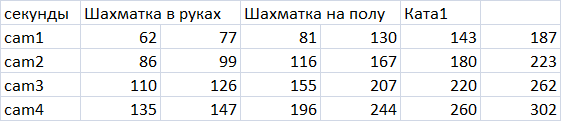

In [ ]:
import cv2
import os

# Путь к папкам с изображениями на Google Диске
path_image_1 = "/content/drive/My Drive/image/image_int/cam1/"
path_image_2 = "/content/drive/My Drive/image/image_int/cam2/"
path_image_3 = "/content/drive/My Drive/image/image_int/cam3/"
path_image_4 = "/content/drive/My Drive/image/image_int/cam4/"

# Создаем папки, если они не существуют
os.makedirs(path_image_1, exist_ok=True)
os.makedirs(path_image_2, exist_ok=True)
os.makedirs(path_image_3, exist_ok=True)
os.makedirs(path_image_4, exist_ok=True)

# Путь к видео
video_paths = {
    'cam1.mp4': '/content/drive/My Drive/video/cam1.mp4',
    'cam2.mp4': '/content/drive/My Drive/video/cam2.mp4',
    'cam3.mp4': '/content/drive/My Drive/video/cam3.mp4',
    'cam4.mp4': '/content/drive/My Drive/video/cam4.mp4'
}

# Время начала и конца в секундах
time_intervals = {
    'cam1.mp4': (62, 77),
    'cam2.mp4': (86, 99),
    'cam3.mp4': (110, 126),
    'cam4.mp4': (135, 147)
}

# Функция для подсчета кадров
def count_frames(video_path, start_time, end_time):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)

    if fps == 0:
        print(f"Не удалось получить FPS для {video_path}")
        return 0

    start_frame = int(start_time * fps)
    end_frame = int(end_time * fps)

    cap.release()

    return end_frame - start_frame

# Функция для извлечения и сохранения кадров
def save_frames(video_path, start_time, end_time, save_path):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)

    start_frame = int(start_time * fps)
    end_frame = int(end_time * fps)

    current_frame = 0
    saved_frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if start_frame <= current_frame < end_frame:
            frame_filename = os.path.join(save_path, f"frame_{saved_frame_count:04d}.jpg")
            cv2.imwrite(frame_filename, frame)
            saved_frame_count += 1

        current_frame += 1

        # Прерываем, если достигли конца видео
        if current_frame >= end_frame:
            break

    cap.release()
    print(f"Сохранено {saved_frame_count} кадров в {save_path}")

# Подсчет кадров и сохранение для каждого видео
for video_name, video_path in video_paths.items():
    start_time, end_time = time_intervals[video_name]
    frame_count = count_frames(video_path, start_time, end_time)
    print(f"{video_name}: {frame_count} кадров")

    # Определяем путь для сохранения кадров
    if 'cam1' in video_name:
        save_frames(video_path, start_time, end_time, path_image_1)
    elif 'cam2' in video_name:
        save_frames(video_path, start_time, end_time, path_image_2)
    elif 'cam3' in video_name:
        save_frames(video_path, start_time, end_time, path_image_3)
    elif 'cam4' in video_name:
        save_frames(video_path, start_time, end_time, path_image_4)

cam1.mp4: 450 кадров
Сохранено 450 кадров в /content/drive/My Drive/image/cam1/
cam2.mp4: 387 кадров
Сохранено 387 кадров в /content/drive/My Drive/image/cam2/
cam3.mp4: 480 кадров
Сохранено 480 кадров в /content/drive/My Drive/image/cam3/
cam4.mp4: 357 кадров
Сохранено 357 кадров в /content/drive/My Drive/image/cam4/


#Подбор изображений по наилучшим изображениям шахматок

In [ ]:
import cv2 as cv
import numpy as np
import os
from tqdm import tqdm  # Импортируем tqdm

# Путь к видео
video_paths = {
    'cam1.mp4': '/content/drive/My Drive/video/cam1.mp4',
    'cam2.mp4': '/content/drive/My Drive/video/cam2.mp4',
    'cam3.mp4': '/content/drive/My Drive/video/cam3.mp4',
    'cam4.mp4': '/content/drive/My Drive/video/cam4.mp4'
}

# Время начала и конца в секундах
time_intervals = {
    'cam1.mp4': (62, 77),
    'cam2.mp4': (86, 99),
    'cam3.mp4': (110, 126),
    'cam4.mp4': (194, 225)
}

# Параметры шахматной доски
num_squares_x = 3  # Количество квадратов по горизонтали
num_squares_y = 5  # Количество квадратов по вертикали

# Путь к папкам с изображениями на Google Диске
image_paths = {
    'cam1.mp4': "/content/drive/My Drive/image2/cam1/",
    'cam2.mp4': "/content/drive/My Drive/image2/cam2/",
    'cam3.mp4': "/content/drive/My Drive/image2/cam3/",
    'cam4.mp4': "/content/drive/My Drive/image2/cam4/"
}

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Создание папок, если они не существуют
for path in image_paths.values():
    os.makedirs(path, exist_ok=True)

# Функция для извлечения кадров и анализа шахматной доски
def process_video(video_path, time_interval, image_path):
    cap = cv.VideoCapture(video_path)
    fps = cap.get(cv.CAP_PROP_FPS)
    start_frame = int(time_interval[0] * fps)
    end_frame = int(time_interval[1] * fps)

    previous_corners = None
    differences = []

    # Используем tqdm для отображения прогресса
    for frame_num in tqdm(range(start_frame, end_frame), desc=f'Processing {os.path.basename(video_path)}'):
        cap.set(cv.CAP_PROP_POS_FRAMES, frame_num)
        ret, frame = cap.read()
        if not ret:
            break

        # Преобразование в оттенки серого
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        # Поиск шахматной доски
        ret, corners = cv.findChessboardCorners(gray, (num_squares_x, num_squares_y), None)

        if ret:
            if previous_corners is not None:
                # Вычисляем разницу между текущими и предыдущими углами
                diff = np.linalg.norm(corners - previous_corners)
                if diff > 10:  # Порог для определения значительных изменений
                    corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
                    # Сохраняем координаты углов
                    differences.append((frame_num, corners2.reshape(-1, 2), frame))  # Сохраняем также само изображение
            previous_corners = corners

    cap.release()

    # Сортировка по различиям (в данном случае по номеру кадра, можно изменить на другой критерий)
    differences.sort(reverse=True, key=lambda x: x[0])

    # Получение 50 изображений с наибольшими различиями
    for i in range(min(50, len(differences))):
        frame_num, corners, frame = differences[i]
        print(f"Frame: {frame_num}, Corners: {corners}")

        # Сохраняем изображение
        cv.imwrite(os.path.join(image_path, f'frame_{frame_num}.png'), frame)

# Обработка каждого видео
for video_name, video_path in video_paths.items():
    process_video(video_path, time_intervals[video_name], image_paths[video_name])

# Обрезка видео

In [ ]:
import os

# Путь к видео
video_paths = {
    'cam1.mp4': '/content/drive/My Drive/video/cam1.mp4',
    'cam2.mp4': '/content/drive/My Drive/video/cam2.mp4',
    'cam3.mp4': '/content/drive/My Drive/video/cam3.mp4',
    'cam4.mp4': '/content/drive/My Drive/video/cam4.mp4'
}

# Временные метки для обрезки (начало и конец в секундах)
cut_times = {
    'cam1.mp4': (656, 716),
    'cam2.mp4': (693, 753),
    'cam3.mp4': (734, 794),
    'cam4.mp4': (774, 834)
}

# Папка для сохранения обрезанных видео
output_folder = '/content/drive/My Drive/video/multi_videos/'

# Создаем папку для обрезанных видео, если она не существует
os.makedirs(output_folder, exist_ok=True)

# Обрезка видео
for video_name, (start, end) in cut_times.items():
    video_path = video_paths[video_name]
    output_video_path = os.path.join(output_folder, f'cut_{video_name}')

    # Вычисляем длительность обрезки
    duration = end - start

    # Команда для обрезки видео
    command = f"ffmpeg -i '{video_path}' -ss {start} -t {duration} -c copy '{output_video_path}'"

    # Выполняем команду
    os.system(command)

print("Обрезка видео завершена.")

Обрезка видео завершена.


#Установка и запуск Pose2Sim

 Установите Anaconda или Miniconda для простоты и избежания риска несовместимости между библиотеками.

После установки откройте командную строку Anaconda и создайте виртуальную среду:

conda create -n Pose2Sim python=3.9 -y
conda activate Pose2Sim
Установите OpenSim: Установите OpenSim Python API (если вы не хотите устанавливать через conda, обратитесь к этой странице):

conda install -c opensim-org opensim -y
Установите Pose2Sim: Если вы не используете Anaconda, введите python -V в терминале, чтобы убедиться, что Python >= 3.9 установлен.

ВАРИАНТ 1: Быстрая установка: Откройте терминал.

pip install pose2sim
ВАРИАНТ 2: Соберите из исходников и протестируйте последние изменения: Откройте терминал в выбранной вами директории и клонируйте репозиторий Pose2Sim.

git clone --depth 1 https://github.com/perfanalytics/pose2sim.git
cd pose2sim
pip install .
Опционально: Для более быстрой работы вы можете запустить на GPU. Установите PyTorch с поддержкой CUDA и cuDNN, а также ONNX Runtime с поддержкой GPU (не доступно на MacOS). Имейте в виду, что поддержка GPU занимает дополнительно 6 ГБ на диске. Полная установка тогда составит 10.75 ГБ вместо 4.75 ГБ.

Запустите nvidia-smi в терминале. Если это приводит к ошибке, ваш GPU, вероятно, несовместим с CUDA. Если нет, обратите внимание на "версию CUDA": это последняя версия, с которой совместим ваш драйвер (больше информации в этом посте).

Затем перейдите на страницу требований ONNXruntime, обратите внимание на последние совместимые требования CUDA и cuDNN. Далее перейдите на сайт PyTorch и установите последнюю версию, которая удовлетворяет этим требованиям (обратите внимание, что torch 2.4 поставляется с cuDNN 9, в то время как torch 2.3 устанавливает cuDNN 8). Например:

pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
Наконец, установите ONNX Runtime с поддержкой GPU:

pip uninstall onnxruntime
pip install onnxruntime-gpu
Проверьте, что все прошло хорошо в Python с этими командами:

import torch; import onnxruntime as ort
print(torch.cuda.is_available(), ort.get_available_providers())

Должно напечатать "True ['CUDAExecutionProvider', ...]"
Примечание о использовании памяти: Полная установка занимает до 11 ГБ свободного места на диске. Однако поддержка GPU не является обязательной и занимает около 6 ГБ. Более того, дополнение маркеров требует TensorFlow и не обязательно дает лучшие результаты. Вы можете сэкономить дополнительно 1.3 ГБ, удалив его: pip uninstall tensorflow. Минимальная установка с тщательно подобранными моделями поз и без поддержки GPU, TensorFlow, PyQt5 займет менее 3 ГБ.

Демонстрация Часть-1: Полное видео до вычисления углов суставов в 3D
Эта демонстрация предоставляет пример эксперимента с человеком, балансирующим на брусе, снятым с 4 камер.

Откройте терминал, введите pip show pose2sim, сообщите местоположение пакета. Скопируйте этот путь и перейдите в папку демонстрации для одного участника: cd <path>\Pose2Sim\Demo_SinglePerson. Введите ipython и попробуйте следующий код:

from Pose2Sim import Pose2Sim
Pose2Sim.calibration()
Pose2Sim.poseEstimation()
Pose2Sim.synchronization()
Pose2Sim.personAssociation()
Pose2Sim.triangulation()
Pose2Sim.filtering()
Pose2Sim.markerAugmentation()
Pose2Sim.kinematics()

# Параметры конфига

In [ ]:
# Настройте параметры вашего проекта здесь.
#
# ВАЖНО:
# Если параметр не найден здесь, Pose2Sim будет искать его значение в файле
# Config.toml на уровне выше. Таким образом, вы можете установить глобальные
# инструкции для Сессии и изменить их для конкретных Участников или Испытаний.
#
# Если вы хотите переопределить параметр для конкретного испытания или участника,
# отредактируйте его файл Config.toml, раскомментировав его ключ (например, [project])
# и изменив его значение (например, frame_range = [10,300]). Или раскомментируйте
# [filtering.butterworth] и установите cut_off_frequency = 10 и т.д.

[project]
multi_person = true # true для испытаний с несколькими участниками. Если false, анализируется только основной человек в сцене (и это происходит намного быстрее).
participant_height = [1.72, 1.40] # м # число, если один участник, список чисел, если несколько участников (в том же порядке, что и Статические испытания) # Используется только для увеличения маркеров
participant_mass = [70.0, 63.5] # кг # Используется только для увеличения маркеров и масштабирования

frame_rate = 'auto' # fps # целое число или 'auto'. Если 'auto', определяется из видео (или по умолчанию 60 fps, если вы работаете с изображениями)
frame_range = [] # Например, [10,300], или [] для всех кадров.
## Если камеры не синхронизированы, указывает диапазон кадров камеры с самым коротким временем записи
## ПРИМЕЧАНИЕ: Если вы хотите временной диапазон вместо этого, используйте frame_range = time_range * frame_rate
## Например, если вы хотите проанализировать с 0.1 до 2 секунд при частоте кадров 60 fps,
## frame_range = [0.1, 2.0]*frame_rate = [6, 120]

exclude_from_batch = [] # Список испытаний, которые следует исключить из пакетного анализа, ['<participant_dir/trial_dir>', 'и т.д.'].
# например, ['S00_P00_Participant/S00_P00_T00_StaticTrial', 'S00_P00_Participant/S00_P00_T01_BalancingTrial']

[pose]
vid_img_extension = 'mp4' # любое видео или изображение
pose_model = 'HALPE_26'  # С RTMLib: HALPE_26 (тело и ноги, по умолчанию), COCO_133 (тело, ноги, руки), COCO_17 (тело)
                         # /!\ Только RTMPose встроен в Pose2Sim. Для всех других методов оценки позы вам придется запускать их самостоятельно, а затем обратиться к документации для преобразования выходных файлов, если это необходимо
                         # С MMPose: HALPE_26, COCO_133, COCO_17, CUSTOM. Смотрите пример CUSTOM в конце файла
                         # С openpose: BODY_25B, BODY_25, BODY_135, COCO, MPII
                         # С mediapipe: BLAZEPOSE
                         # С alphapose: HALPE_26, HALPE_68, HALPE_136, COCO_133
                         # С deeplabcut: CUSTOM. Смотрите пример в конце файла
mode = 'balanced' # 'lightweight', 'balanced', 'performance'
det_frequency = 1 # Запускать обнаружение человека только каждые N кадров, а между ними отслеживать ранее обнаруженные ограничивающие рамки (обнаружение ключевых точек все еще выполняется на всех кадрах).
                  # Равно или больше 1, может быть таким высоким, как вы хотите в простых не многолюдных случаях. Намного быстрее, но может быть менее точным.
display_detection = true
overwrite_pose = false # установите в false, если не хотите пересчитывать оценку позы, когда она уже была выполнена
save_video = 'to_video' # 'to_video' или 'to_images', 'none', или ['to_video', 'to_images']
output_format = 'openpose' # 'openpose', 'mmpose', 'deeplabcut', 'none' или список из них # /!\ только 'openpose' поддерживается на данный момент

[synchronization]
display_sync_plots = true # true или false (строчные буквы)
keypoints_to_consider = ['RWrist'] # 'all', если все точки должны быть учтены, например, если участник не выполнял никаких резких движений. В этом случае захват должен длиться не менее 5-10 секунд
                           # ['RWrist', 'RElbow'] список имен ключевых точек, если вы хотите указать ключевые точки с резким вертикальным движением.
approx_time_maxspeed = 'auto' # 'auto', если вы хотите учитывать весь захват (по умолчанию, медленнее, если длинные последовательности)
                           # [10.0, 2.0, 8.0, 11.0] список времен (в секундах), если вы хотите указать приблизительное время четкого вертикального события для каждой камеры
time_range_around_maxspeed = 2.0 # Поиск наилучшей корреляции в диапазоне [approx_time_maxspeed - time_range_around_maxspeed, approx_time_maxspeed  + time_range_around_maxspeed]
likelihood_threshold = 0.4 # Ключевые точки, вероятность которых ниже порога вероятности, отфильтровываются
filter_cutoff = 6 # временные ряды сглаживаются для получения согласованной временной корреляции
filter_order = 4

# Не волнуйтесь, калибровка не так сложна, как только вы поймете!
[calibration]
calibration_type = 'convert' # 'convert' или 'calculate'

   [calibration.convert]
   convert_from = 'qualisys' # 'caliscope', 'qualisys', 'optitrack', 'vicon', 'opencap', 'easymocap', 'biocv', 'anipose', или 'freemocap'
      [calibration.convert.caliscope]  # Параметры не требуются
      [calibration.convert.qualisys]
      binning_factor = 1 # Обычно 1, кроме случаев, когда съемка ведется в 540p, где обычно 2
      [calibration.convert.optitrack]  # Смотрите readme для инструкций
      [calibration.convert.vicon]      # Параметры не требуются
      [calibration.convert.opencap]    # Параметры не требуются
      [calibration.convert.easymocap]  # Параметры не требуются
      [calibration.convert.biocv]      # Параметры не требуются
      [calibration.convert.anipose]    # Параметры не требуются
      [calibration.convert.freemocap]  # Параметры не требуются

   [calibration.calculate]
      # Свойства камеры, теоретически нужно рассчитывать только один раз за время жизни камеры
      [calibration.calculate.intrinsics]
      overwrite_intrinsics = false # установите в false, если не хотите пересчитывать внутренние параметры
      show_detection_intrinsics = true # true или false (строчные буквы)
      intrinsics_extension = 'jpg' # любое видео или изображение
      extract_every_N_sec = 1 # если видео, извлекать кадры каждые N секунд (может быть <1)
      intrinsics_corners_nb = [4,7]
      intrinsics_square_size = 60 # мм

      # Размещения камер, необходимо выполнять перед каждой сессией
      [calibration.calculate.extrinsics]
      calculate_extrinsics = true # true или false (строчные буквы)
      extrinsics_method = 'scene' # 'board', 'scene', 'keypoints'
      # 'board' должен быть достаточно большим, чтобы его можно было обнаружить, когда он лежит на полу. Не рекомендуется.
      # 'scene' включает в себя ручное нажатие на любую точку с известными координатами на сцене. Обычно более точно, если точки разбросаны.
      # 'keypoints' использует автоматическую оценку позы человека, свободно гуляющего и размахивающего руками в сцене. Немного менее точно, требует синхронизированных камер.
      moving_cameras = false # Пока не реализовано

         [calibration.calculate.extrinsics.board]
         show_reprojection_error = true # true или false (строчные буквы)
         extrinsics_extension = 'png' # любое видео или изображение
         extrinsics_corners_nb = [4,5] # [H,W], а не [w,h]
         extrinsics_square_size = 60 # мм # [h,w], если квадрат на самом деле является прямоугольником

         [calibration.calculate.extrinsics.scene]
         show_reprojection_error = true # true или false (строчные буквы)
         extrinsics_extension = 'png' # любое видео или изображение
         # список 3D координат, которые нужно вручную пометить на изображениях. Может быть также двумерная плоскость.
         # в м -> в отличие от внутренних параметров, НЕ в мм!
         object_coords_3d =   [[-2.0,  0.3,  0.0],
                              [-2.0 , 0.0,  0.0],
                              [-2.0, 0.0,  0.05],
                              [-2.0, -0.3 ,  0.0],
                              [0.0,  0.3,  0.0],
                              [0.0, 0.0,  0.0],
                              [0.0, 0.0,  0.05],
                              [0.0, -0.3,  0.0]]

         [calibration.calculate.extrinsics.keypoints]
         # Скоро будет!

[personAssociation]
   likelihood_threshold_association = 0.3

   [personAssociation.single_person]
   reproj_error_threshold_association = 20 # px
   tracked_keypoint = 'Neck' # Если шея не обнаружена моделью позы, проверьте skeleton.py
               # и выберите стабильную точку для отслеживания интересующего человека (например, 'right_shoulder' или 'RShoulder')

   [personAssociation.multi_person]
   reconstruction_error_threshold = 0.1 # 0.1 = 10 см
   min_affinity = 0.2 # аффинность ниже которой соответствие игнорируется

[triangulation]
reproj_error_threshold_triangulation = 15 # px
likelihood_threshold_triangulation= 0.3
min_cameras_for_triangulation = 2
interpolation = 'linear' #linear, slinear, quadratic, cubic, или none
                        # 'none', если вы не хотите интерполировать отсутствующие точки
interp_if_gap_smaller_than = 10 # не интерполировать большие разрывы
fill_large_gaps_with = 'last_value' # 'last_value', 'nan', или 'zeros'
show_interp_indices = true # true или false (строчные буквы). Для каждой ключевой точки вернуть кадры, которые нужно интерполировать
handle_LR_swap = false # Лучше, если камер немного (например, меньше 4) с риском замены конечностей (например, камера, обращенная к сагиттальной плоскости), иначе немного менее точно и медленнее
undistort_points = false # Лучше, если искаженное изображение (параллельные линии изогнуты по краю или хотя бы один параметр > 10^-2), но ненужное (и немного медленнее), если искажения низкие
make_c3d = false # сохранить треангулированные данные в формате c3d в дополнение к trc

[filtering]
type = 'butterworth' # butterworth, kalman, gaussian, LOESS, median, butterworth_on_speed
display_figures = true # true или false (строчные буквы)
make_c3d = false # также сохранить треангулированные данные в формате c3d

   [filtering.butterworth]
   order = 4
   cut_off_frequency = 6 # Гц
   [filtering.kalman]
   # Насколько больше вы доверяете результатам треангуляции (измерениям), чем предыдущим данным (процесс, предполагающий постоянное ускорение)?
   trust_ratio = 100 # = measurement_trust/process_trust ~= process_noise/measurement_noise
   smooth = true # должно быть true, если только вам не нужно фильтровать в реальном времени
   [filtering.butterworth_on_speed]
   order = 4
   cut_off_frequency = 10 # Гц
   [filtering.gaussian]
   sigma_kernel = 2 #px
   [filtering.LOESS]
   nb_values_used = 30 # = доля данных, используемых * количество кадров
   [filtering.median]
   kernel_size = 9

[markerAugmentation]
## Требуются следующие маркеры: ["Neck", "RShoulder", "LShoulder", "RHip", "LHip", "RKnee", "LKnee",
##        "RAnkle", "LAnkle", "RHeel", "LHeel", "RSmallToe", "LSmallToe",
##        "RBigToe", "LBigToe", "RElbow", "LElbow", "RWrist", "LWrist"]
make_c3d = true # сохранить треангулированные данные в формате c3d в дополнение к trc

[kinematics]
use_augmentation = true  # true или false (строчные буквы) # Установите в true, если хотите использовать модель с увеличенными маркерами
right_left_symmetry = true # true или false (строчные буквы) # Установите в false только если у вас есть веские причины полагать, что участник не симметричен (например, протез)

remove_individual_scaling_setup = true # true или false (строчные буквы) # Если true, файлы настройки индивидуального масштабирования удаляются, чтобы избежать загромождения
remove_individual_IK_setup = true # true или false (строчные буквы) # Если true, файлы настройки индивидуального IK удаляются, чтобы избежать загромождения
fastest_frames_to_remove_percent = 0.1 # Кадры с высокой скоростью считаются выбросами
close_to_zero_speed_m = 0.2 # Сумма для всех ключевых точек: около 50 px/кадр или 0.2 м/кадр
large_hip_knee_angles = 45 # Углы бедра и колена ниже этого значения считаются неточными
trimmed_extrema_percent = 0.5 # Доля самых экстремальных значений сегмента, которые нужно удалить перед расчетом их среднего

# КАСТОМНЫЙ скелет, если вы обучили свою собственную модель, например, из DeepLabCut или MMPose.
# Убедитесь, что идентификаторы узлов соответствуют номерам столбцов 2D файла позы, начиная с нуля.
#
# Если вы хотите выполнить обратную кинематику, вам также нужно будет создать модель OpenSim
# и добавить в ее набор маркеров местоположение, где вы ожидаете, что будут обнаружены треангулированные ключевые точки.
#
# В этом примере CUSTOM воспроизводит скелет HALPE_26 (стандартные скелеты хранятся в skeletons.py).
# Вы можете создать столько пользовательских скелетов, сколько хотите, просто добавьте их ниже и переименуйте.
#
# Проверьте иерархию вашей модели с помощью:  for pre, _, node in RenderTree(model):
#                                      print(f'{pre}{node.name} id={node.id}')

In [ ]:
#@title Запуск Pose2Sim

conda activate Pose2Sim

cd C:\Users\s106\.conda\envs\Pose2Sim\Lib\site-packages\Pose2Sim\Karate_multi_3

ipython

from Pose2Sim import Pose2Sim
Pose2Sim.calibration()
Pose2Sim.poseEstimation()
Pose2Sim.synchronization()
Pose2Sim.personAssociation()
Pose2Sim.triangulation()
Pose2Sim.filtering()
Pose2Sim.markerAugmentation()
Pose2Sim.kinematics()

#Ошибка при выполнении внешней калибровки Pose2Sim с помощью доски board

In [ ]:
Ошибка при выполнении внешней калибровки Pose2Sim  с доской board

error                                     Traceback (most recent call last)
Cell In[2], line 1
----> 1 Pose2Sim.calibration()

File ~\.conda\envs\Pose2Sim\lib\site-packages\Pose2Sim\Pose2Sim.py:194, in calibration(config)
    191 logging.info("---------------------------------------------------------------------\n")
    192 start = time.time()
--> 194 calibrate_cams_all(config_dict)
    196 end = time.time()
    197 logging.info(f'\nCalibration took {end-start:.2f} s.\n')

File ~\.conda\envs\Pose2Sim\lib\site-packages\Pose2Sim\calibration.py:1354, in calibrate_cams_all(config_dict)
   1351 calib_fun = calib_mapping[calib_full_type]
   1353 # Calibrate
-> 1354 ret, C, S, D, K, R, T = calib_fun(*args_calib_fun)
   1356 # Write calibration file
   1357 toml_write(calib_output_path, C, S, D, K, R, T)

File ~\.conda\envs\Pose2Sim\lib\site-packages\Pose2Sim\calibration.py:532, in calib_calc_fun(calib_dir, intrinsics_config_dict, extrinsics_config_dict)
    528     if nb_cams_intrinsics != nb_cams_extrinsics:
    529         raise Exception(f'Error: The number of cameras is not consistent:\
    530                 Found {nb_cams_intrinsics} cameras based on the number of intrinsic folders or on calibration file data,\
    531                 and {nb_cams_extrinsics} cameras based on the number of extrinsic folders.')
--> 532     ret, C, S, D, K, R, T = calibrate_extrinsics(calib_dir, extrinsics_config_dict, C, S, K, D)
    533 else:
    534     logging.info(f'\nExtrinsic parameters won\'t be calculated. Set "calculate_extrinsics" to true in Config.toml to calculate them.')

File ~\.conda\envs\Pose2Sim\lib\site-packages\Pose2Sim\calibration.py:712, in calibrate_extrinsics(calib_dir, extrinsics_config_dict, C, S, K, D)
    710 # Calculate extrinsics
    711 mtx, dist = np.array(K[i]), np.array(D[i])
--> 712 _, r, t = cv2.solvePnP(np.array(objp)*1000, imgp, mtx, dist)
    713 r, t = r.flatten(), t.flatten()
    714 t /= 1000

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'solvePnP'
> Overload resolution failed:
>  - imagePoints is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'imagePoints'


Ошибка, которую вы видите, связана с функцией `cv2.solvePnP` из библиотеки OpenCV. Сообщение об ошибке указывает на то, что аргумент `imagePoints` не является числовым кортежем, что означает, что переданные данные не соответствуют ожидаемому формату.

#Создание клипа с 4-мя распознанными видео

In [ ]:
Synchronizing...
--> Camera cam03 and cam01: 35 frames offset, correlation 0.69.
--> Camera cam03 and cam02: 30 frames offset, correlation 0.51.
--> Camera cam03 and cam04: -8 frames offset, correlation 0.51.

In [ ]:
import subprocess
import json
import cv2 as cv
from moviepy.editor import VideoFileClip, clips_array

# Исходные видео
video_output_1 = '/content/drive/My Drive/video/pose/cam01_pose.mp4'
video_output_2 = '/content/drive/My Drive/video/pose/cam02_pose.mp4'
video_output_3 = '/content/drive/My Drive/video/pose/cam03_pose.mp4'
video_output_4 = '/content/drive/My Drive/video/pose/cam04_pose.mp4'

output_video_list = [video_output_1, video_output_2, video_output_3, video_output_4]

# Получение FPS для каждого видео
fps_list = []
for video_path in output_video_list:
    cap = cv.VideoCapture(video_path)
    fps = cap.get(cv.CAP_PROP_FPS)
    print(fps)
    fps_list.append(fps)
    cap.release()

# Загрузка видео
video_clips = [VideoFileClip(video) for video in output_video_list]

# Синхронизация видео
# cam03 (основное видео)
cam03_duration = video_clips[2].duration

# cam01: отстает на 35 кадров
cam01_offset = 35 / fps_list[0]  # 35 кадров
video_clips[0] = video_clips[0].subclip(max(0, cam01_offset), cam03_duration)

# cam02: отстает на 30 кадров
cam02_offset = 30 / fps_list[1]  # 30 кадров
video_clips[1] = video_clips[1].subclip(max(0, cam02_offset), cam03_duration)

# cam04: опережает на 8 кадров
cam04_offset = -8 / fps_list[3]  # -8 кадров
video_clips[3] = video_clips[3].subclip(max(0, cam04_offset), cam03_duration)

# Создание плитки из видео
final_video = clips_array([[video_clips[0], video_clips[1]],
                            [video_clips[2], video_clips[3]]])

# Сохранение и вывод финального видео
final_video_path = '/content/drive/My Drive/video/pose/final_video.mp4'
final_video.write_videofile(final_video_path, codec='libx264')

30.02
29.8
30.002
29.906
Moviepy - Building video /content/drive/My Drive/video/pose/final_video.mp4.
Moviepy - Writing video /content/drive/My Drive/video/pose/final_video.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/video/pose/final_video.mp4


#Результаты проведения функции kinematics - кинематика

Видео с движением скелета в OpenSim

https://drive.google.com/file/d/1Um3dmZS1-uZAK1-UpOgARfPO-qMuOqb3/view?usp=sharing

In [ ]:
import pandas as pd

def read_mot_file(file_path):
    with open(file_path, 'r') as file:
        # Читаем все строки файла
        lines = file.readlines()

    # Ищем строку с заголовками (первая строка данных)
    for i, line in enumerate(lines):
        if line.startswith('time'):
            header_index = i
            break
    else:
        raise ValueError("Header not found in the file.")

    # Извлекаем названия колонок
    column_names = list(filter(None, lines[header_index].strip().split('\t')))

    # Извлекаем данные после заголовка
    data_lines = lines[header_index + 1:]

    # Создаем список для хранения данных
    data = []

    # Обрабатываем каждую строку данных
    for line in data_lines:
        # Разделяем строку по табуляции и удаляем пустые строки
        row = list(filter(None, line.strip().split('\t')))
        # Проверяем, что строка не пустая
        if row:
            # Преобразуем строки в числа (float)
            data.append([float(value) for value in row])

    # Проверяем, что данные были добавлены
    if not data:
        raise ValueError("No data found in the file after the header.")

    # Создаем DataFrame
    df = pd.DataFrame(data, columns=column_names)

    return df

# Пример использования
file_path = '/content/Karate_Cell_1_01.mot'  # Укажите путь к вашему файлу
df = read_mot_file(file_path)



In [ ]:
# Выводим DataFrame
df

,time,pelvis_tilt,pelvis_list,pelvis_rotation,pelvis_tx,pelvis_ty,pelvis_tz,hip_flexion_r,hip_adduction_r,hip_rotation_r,...,pro_sup_r,wrist_flex_r,wrist_dev_r,arm_flex_l,arm_add_l,arm_rot_l,elbow_flex_l,pro_sup_l,wrist_flex_l,wrist_dev_l
0,0.000000,14.479902,11.768095,-186.659308,0.457378,0.645875,-0.673857,16.684209,-2.997537,16.401158,...,36.456475,0.0,5.061303,-73.719035,36.180829,-17.613064,75.809089,73.742311,0.0,5.061303
1,0.034483,13.942246,11.387373,-186.114457,0.455540,0.646903,-0.674462,15.565153,-3.474138,17.045814,...,47.778830,0.0,5.044661,-74.035205,36.237272,-17.007892,75.673834,74.487112,0.0,5.044661
2,0.068966,13.733843,11.666130,-185.648842,0.453079,0.648286,-0.673263,14.721912,-3.360191,17.362090,...,76.460271,0.0,5.013748,-73.809656,36.172940,-16.870036,74.844784,75.514231,0.0,5.013748
3,0.103448,13.939310,12.094952,-184.323339,0.456156,0.650385,-0.675469,15.131791,-2.902332,15.532044,...,75.487285,0.0,5.011172,-73.319952,34.650428,-16.010693,75.239411,74.348428,0.0,5.011172
4,0.137931,13.602412,11.892827,-185.043269,0.455346,0.650476,-0.675624,14.985479,-2.834081,15.913850,...,69.072876,0.0,5.009485,-73.550291,35.616502,-17.486073,74.991274,74.293412,0.0,5.009485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,39.862069,155.020887,134.933276,119.152764,0.706300,0.655662,-0.556171,58.082835,3.884276,-48.722248,...,0.628623,0.0,5.000000,1257.896903,-1227.872620,3464.372840,81.916376,75.137112,0.0,5.000000
1157,39.896552,167.580504,158.612505,102.152070,0.714400,0.671962,-0.581047,36.957049,7.241050,-16.254700,...,76.427108,0.0,5.000000,1239.610611,-1244.343795,3425.142970,75.022464,77.282235,0.0,5.000000
1158,39.931034,136.365068,107.955239,113.698145,0.804141,0.613667,-0.071848,43.047668,15.479038,-6.008087,...,0.854454,0.0,5.000000,1258.843563,-1254.438440,3576.591842,0.814178,2.136365,0.0,5.000000
1159,39.965517,138.994189,108.861033,111.359299,0.783669,0.634669,-0.105171,45.963475,17.749278,-5.033554,...,1.933335,0.0,5.000000,1252.482147,-1258.135831,3536.585687,0.651090,2.088834,0.0,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   1161 non-null   float64
 1   pelvis_tilt            1161 non-null   float64
 2   pelvis_list            1161 non-null   float64
 3   pelvis_rotation        1161 non-null   float64
 4   pelvis_tx              1161 non-null   float64
 5   pelvis_ty              1161 non-null   float64
 6   pelvis_tz              1161 non-null   float64
 7   hip_flexion_r          1161 non-null   float64
 8   hip_adduction_r        1161 non-null   float64
 9   hip_rotation_r         1161 non-null   float64
 10  knee_angle_r           1161 non-null   float64
 11  knee_angle_r_beta      1161 non-null   float64
 12  ankle_angle_r          1161 non-null   float64
 13  subtalar_angle_r       1161 non-null   float64
 14  mtp_angle_r            1161 non-null   float64
 15  hip_

In [ ]:
'''
1. **time**: Время в секундах.
2. **pelvis_tilt**: Наклон таза (в градусах).
3. **pelvis_list**: Боковой наклон таза (в градусах).
4. **pelvis_rotation**: Вращение таза (в градусах).
5. **pelvis_tx, pelvis_ty, pelvis_tz**: Позиция таза по осям X, Y и Z соответственно (в метрах).
6. **hip_flexion_r**: Сгибание правого бедра (в градусах).
7. **hip_adduction_r**: Приведение правого бедра (в градусах).
8. **hip_rotation_r**: Вращение правого бедра (в градусах).
9. **knee_angle_r**: Угол правого колена (в градусах).
10. **knee_angle_r_beta**: Дополнительный угол правого колена (в градусах).
11. **ankle_angle_r**: Угол правого голеностопного сустава (в градусах).
12. **subtalar_angle_r**: Угол правого подтаранного сустава (в градусах).
13. **mtp_angle_r**: Угол правого плюснефалангового сустава (в градусах).
14. **hip_flexion_l**: Сгибание левого бедра (в градусах).
15. **hip_adduction_l**: Приведение левого бедра (в градусах).
16. **hip_rotation_l**: Вращение левого бедра (в градусах).
17. **knee_angle_l**: Угол левого колена (в градусах).
18. **knee_angle_l_beta**: Дополнительный угол левого колена (в градусах).
19. **ankle_angle_l**: Угол левого голеностопного сустава (в градусах).
20. **subtalar_angle_l**: Угол левого подтаранного сустава (в градусах).
21. **mtp_angle_l**: Угол левого плюснефалангового сустава (в градусах).
22. **L5_S1_Flex_Ext**: Сгибание/разгибание в сегменте L5-S1 (в градусах).
23. **L5_S1_Lat_Bending**: Боковое сгибание в сегменте L5-S1 (в градусах).
24. **L5_S1_axial_rotation**: Осевое вращение в сегменте L5-S1 (в градусах).
25. **L4_L5_Flex_Ext**: Сгибание/разгибание в сегменте L4-L5 (в градусах).
26. **L4_L5_Lat_Bending**: Боковое сгибание в сегменте L4-L5 (в градусах).
27. **L4_L5_axial_rotation**: Осевое вращение в сегменте L4-L5 (в градусах).
28. **L3_L4_Flex_Ext**: Сгибание/разгибание в сегменте L3-L4 (в градусах).
29. **L3_L4_Lat_Bending**: Боковое сгибание в сегменте L3-L4 (в градусах).
30. **L3_L4_axial_rotation**: Осевое вращение в сегменте L3-L4 (в градусах).
31. **L2_L3_Flex_Ext**: Сгибание/разгибание в сегменте L2-L3 (в градусах).
32. **L2_L3_Lat_Bending**: Боковое сгибание в сегменте L2-L3 (в градусах).
33. **L2_L3_axial_rotation**: Осевое вращение в сегменте L2-L3 (в градусах).
34. **L1_L2_Flex_Ext**: Сгибание/разгибание в сегменте L1-L2 (в градусах).
35. **L1_L2_Lat_Bending**: Боковое сгибание в сегменте L1-L2 (в градусах).
36. **L1_L2_axial_rotation**: Осевое вращение в сегменте L1-L2 (в градусах).
37. **L1_T12_Flex_Ext**: Сгибание/разгибание в сегменте L1-T12 (в градусах).
38. **L1_T12_Lat_Bending**: Боковое сгибание в сегменте L1-T12 (в градусах).
39. **L1_T12_axial_rotation**: Осевое вращение в сегменте L1-T12 (в градусах).
40. **Abs_r3, Abs_r2, Abs_r1**: Абсолютные углы в правом плечевом поясе (в градусах).
41. **Abs_t1, Abs_t2**: Абсолютные углы в верхней части тела (в градусах).
42. **neck_flexion**: Сгибание шеи (в градусах).
43. **neck_bending**: Боковое сгибание шеи (в градусах).
44. **neck_rotation**: Вращение шеи (в градусах).
45. **arm_flex_r**: Сгибание правой руки (в градусах).
46. **arm_add_r**: Приведение правой руки (в градусах).
47. **arm_rot_r**: Вращение правой руки (в градусах).
48. **elbow_flex_r**: Сгибание правого локтя (в градусах).
49. **pro_sup_r**: Пронация/супинация правой руки (в градусах).
50. **wrist_flex_r**: Сгибание правого запястья (в градусах).
51. **wrist_dev_r**: Боковое сгибание правого запястья (в градусах).
52. **arm_flex_l**: Сгибание левой руки (в градусах).
53. **arm_add_l**: Приведение левой руки (в градусах).
54. **arm_rot_l**: Вращение левой руки (в градусах).
55. **elbow_flex_l**: Сгибание левого локтя (в градусах).
56. **pro_sup_l**: Пронация/супинация левой руки (в градусах).
57. **wrist_flex_l**: Сгибание левого запястья (в градусах).
58. **wrist_dev_l**: Боковое сгибание левого запястья (в градусах).
'''

In [ ]:
#Добавление номера кадра
import pandas as pd

# Предположим, что ваш DataFrame называется df
df['frame'] = (df['time'] * 30).astype(int)

In [ ]:
df

,time,pelvis_tilt,pelvis_list,pelvis_rotation,pelvis_tx,pelvis_ty,pelvis_tz,hip_flexion_r,hip_adduction_r,hip_rotation_r,...,wrist_flex_r,wrist_dev_r,arm_flex_l,arm_add_l,arm_rot_l,elbow_flex_l,pro_sup_l,wrist_flex_l,wrist_dev_l,frame
0,0.000000,14.479902,11.768095,-186.659308,0.457378,0.645875,-0.673857,16.684209,-2.997537,16.401158,...,0.0,5.061303,-73.719035,36.180829,-17.613064,75.809089,73.742311,0.0,5.061303,0
1,0.034483,13.942246,11.387373,-186.114457,0.455540,0.646903,-0.674462,15.565153,-3.474138,17.045814,...,0.0,5.044661,-74.035205,36.237272,-17.007892,75.673834,74.487112,0.0,5.044661,1
2,0.068966,13.733843,11.666130,-185.648842,0.453079,0.648286,-0.673263,14.721912,-3.360191,17.362090,...,0.0,5.013748,-73.809656,36.172940,-16.870036,74.844784,75.514231,0.0,5.013748,2
3,0.103448,13.939310,12.094952,-184.323339,0.456156,0.650385,-0.675469,15.131791,-2.902332,15.532044,...,0.0,5.011172,-73.319952,34.650428,-16.010693,75.239411,74.348428,0.0,5.011172,3
4,0.137931,13.602412,11.892827,-185.043269,0.455346,0.650476,-0.675624,14.985479,-2.834081,15.913850,...,0.0,5.009485,-73.550291,35.616502,-17.486073,74.991274,74.293412,0.0,5.009485,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,39.862069,155.020887,134.933276,119.152764,0.706300,0.655662,-0.556171,58.082835,3.884276,-48.722248,...,0.0,5.000000,1257.896903,-1227.872620,3464.372840,81.916376,75.137112,0.0,5.000000,1195
1157,39.896552,167.580504,158.612505,102.152070,0.714400,0.671962,-0.581047,36.957049,7.241050,-16.254700,...,0.0,5.000000,1239.610611,-1244.343795,3425.142970,75.022464,77.282235,0.0,5.000000,1196
1158,39.931034,136.365068,107.955239,113.698145,0.804141,0.613667,-0.071848,43.047668,15.479038,-6.008087,...,0.0,5.000000,1258.843563,-1254.438440,3576.591842,0.814178,2.136365,0.0,5.000000,1197
1159,39.965517,138.994189,108.861033,111.359299,0.783669,0.634669,-0.105171,45.963475,17.749278,-5.033554,...,0.0,5.000000,1252.482147,-1258.135831,3536.585687,0.651090,2.088834,0.0,5.000000,1198


In [ ]:
df.to_csv('Karate_3.csv')

Файл с расширением .mot (Motion Capture) содержит данные о движении, которые обычно используются в биомеханике, анимации и других областях, связанных с анализом движений. Давайте разберем структуру и содержание вашего файла:

Заголовок файла Coordinates: Указывает, что данные представляют собой координаты. version=1: Версия формата файла. nRows=898: Количество строк данных (898 временных точек). nColumns=63: Количество столбцов данных (63 параметра). inDegrees=yes: Указывает, что угловые значения представлены в градусах. Описание единиц измерения Указано, что единицы измерения являются С.И. (метры, секунды, Ньютон и т.д.). Данные После заголовка идет строка с названиями параметров, которые представлены в виде временных рядов. Вот некоторые из них:

time: Время (в секундах).

pelvis_tilt, pelvis_list, pelvis_rotation: Углы наклона, бокового наклона и вращения таза.

pelvis_tx, pelvis_ty, pelvis_tz: Позиция таза по осям X, Y и Z.

hip_flexion_r, hip_adduction_r, hip_rotation_r: Углы сгибания, приведения и вращения правого бедра.

knee_angle_r, knee_angle_r_beta: Углы сгибания правого колена.

ankle_angle_r, subtalar_angle_r, mtp_angle_r: Углы для правой лодыжки, подтаранной и плюсневой суставов.

L5_S1_Flex_Ext, L5_S1_Lat_Bending, L5_S1_axial_rotation: Углы сгибания/разгибания, бокового наклона и вращения в области поясничного отдела (L5-S1).

neck_flexion, neck_bending, neck_rotation: Углы сгибания, бокового наклона и вращения шеи.

arm_flex_r, arm_add_r, arm_rot_r: Углы сгибания, приведения и вращения правой руки.

elbow_flex_r, wrist_flex_r, wrist_dev_r: Углы сгибания локтя, запястья и отклонения запястья для правой руки.

In [ ]:
# Установка библиотеки moviepy
!pip install moviepy

# Импорт необходимых библиотек
from moviepy.editor import VideoFileClip

# Загрузка видео (замените 'path_to_your_video' на путь к вашему видео)
video_path = 'karate_3_Zinv.mp4'
output_path = 'karate_3_Zinv_flipped.mp4'

# Открытие видео
clip = VideoFileClip(video_path)

# Переворот видео на 180 градусов
flipped_clip = clip.rotate(180)

# Сохранение перевернутого видео
flipped_clip.write_videofile(output_path, codec='libx264')

# Закрытие клипа
clip.close()
flipped_clip.close()

OSError: MoviePy error: failed to read the duration of file karate_3_Zinv.mp4.
Here are the file infos returned by ffmpeg:

ffmpeg version 4.2.2-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libvorbis --enable-libopus --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libdav1d --enable-libxvid --enable-libzvbi --enable-libzimg
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x57a6500] moov atom not found
karate_3_Zinv.mp4: Invalid data found when processing input


In [ ]:
#Перекодировка из webm в mp4
!ffmpeg -i karate_3_Zinv.webm -vf "scale=1332:860" -c:v libx264 -c:a aac karate_3_Zinv.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab